In [1]:
import sys
sys.path.append('/Users/tamurashuntarou/CML/code/master_shap')
import shap
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
# データセットの読み込み
california = fetch_california_housing()
X, y = california.data, california.target

# データセットの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# モデルの訓練
model = xgboost.XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [9]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing()
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = dataset.target

In [15]:
import xgboost
import shap
model = xgboost.XGBRegressor()
model.fit(X, y)
# 1. モデル shap.Explainer()に渡す
explainer = shap.TreeExplainer(model)
# 2. 説明変数(特徴量)を渡す
shap_values = explainer(X)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb3 in position 892: invalid start byte

In [3]:
# SHAP値の計算
explainer = shap.Explainer(model.predict, X_test)
shap_values = explainer(X_test)

ExactExplainer explainer: 4129it [02:26, 27.71it/s]                          


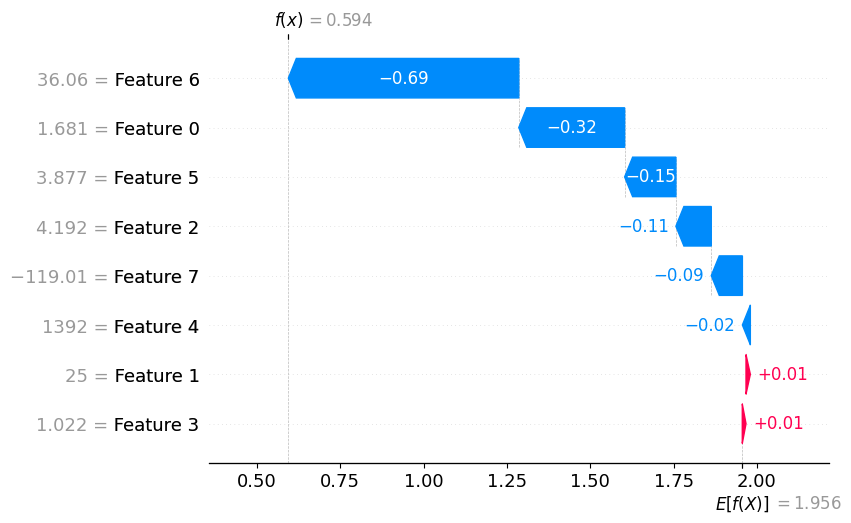

In [8]:
shap.plots.waterfall(shap_values[0], max_display=14, show=False)

TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# SHAP値の計算
background = shap.sample(X_train, 10)
explainer = shap.KernelExplainer(model.predict, background)
shap_values = explainer(X_test)

  6%|▋         | 263/4128 [00:05<01:17, 49.85it/s]


KeyboardInterrupt: 

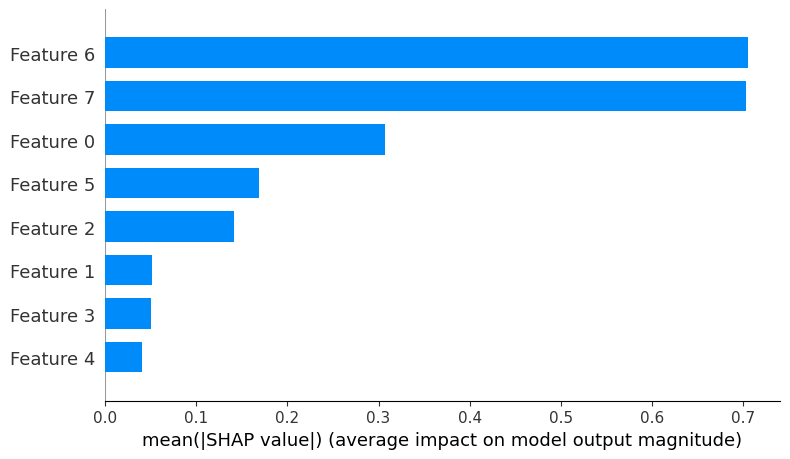

In [6]:
# SHAP値のプロット
shap.summary_plot(shap_values, X_test, plot_type="bar")